In [1]:
cd("../")

In [2]:
using Pkg
Pkg.activate(".")

 Activating environment at `~/APMT-Julia/Project.toml`


In [12]:
using PyCall
using PyPlot

cartopy = pyimport("cartopy")
ccrs = pyimport("cartopy.crs")
cfeat = pyimport("cartopy.feature")
matcolors = pyimport("matplotlib.colors")
;

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


In [3]:
include("ACAI.jl");

In [4]:
input = "input/input_example_run_adv_approach.yml"
simulation, emission, climateoutput, aqoutput = runACAI(input);

running ACAI: advanced approach
reading existing output files


In [8]:
println("filename: ",simulation.filename)
println("emissions: ",simulation.emissionname)

filename: example_run_adv_approach
emissions: subsonic_2035


In [22]:
lon = emission.lon
lat = emission.lat
;

In [9]:
climateoutput.RF_CO2av #years x nrun

801×10000 Array{Float64,2}:
 0.00211011   0.00211363   0.00200621   …  0.00224675   0.00208132
 0.0019152    0.00190866   0.00180801      0.00203193   0.00187587
 0.00186083   0.00184551   0.00174481      0.00196754   0.00181045
 0.00178761   0.0017644    0.00166492      0.00188377   0.00172769
 0.0017308    0.00170056   0.00160173      0.00181809   0.00166225
 0.00168256   0.00164605   0.00154768   …  0.0017621    0.00160628
 0.00164113   0.00159904   0.001501        0.00171387   0.00155795
 0.0016048    0.00155775   0.00145998      0.00167152   0.00151547
 0.00157244   0.00152098   0.00142344      0.00163381   0.00147764
 0.00154325   0.00148786   0.00139056      0.00159982   0.00144359
 0.00151663   0.00145777   0.00136071   …  0.00156892   0.00141268
 0.00149215   0.00143021   0.00133341      0.00154057   0.0013844
 0.0014695    0.00140482   0.00130831      0.00151444   0.00135841
 ⋮                                      ⋱               
 0.000823787  0.00073732   0.000666978     0.

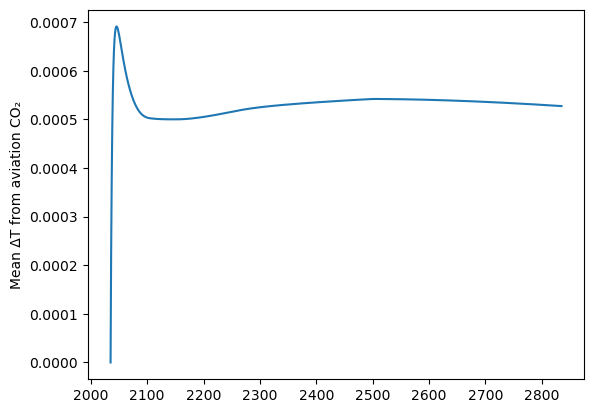

In [17]:
ΔT_CO2av_mean = mean(climateoutput.ΔT_CO2av, dims=2);
plot(simulation.interp_years, ΔT_CO2av_mean)
plt.ylabel("Mean ΔT from aviation CO₂")
plt.show();

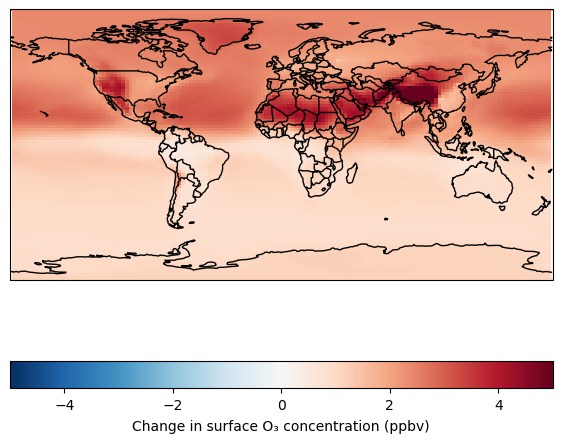

In [27]:
iyr = 1;
ΔX = aqoutput.ΔX_O3_NOx[:,:,iyr] #(144 lon x 91 lat)

figure(figsize=(7,7))
ax = subplot(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                ΔX, 
                transform=ccrs.PlateCarree(), 
                cmap="RdBu_r",
                vmin=-5, vmax=5,
)
cbar = plt.colorbar(h,orientation="horizontal")
cbar.set_label("Change in surface O₃ concentration from NOₓ emissions (ppbv)", labelpad=5)
plt.show()

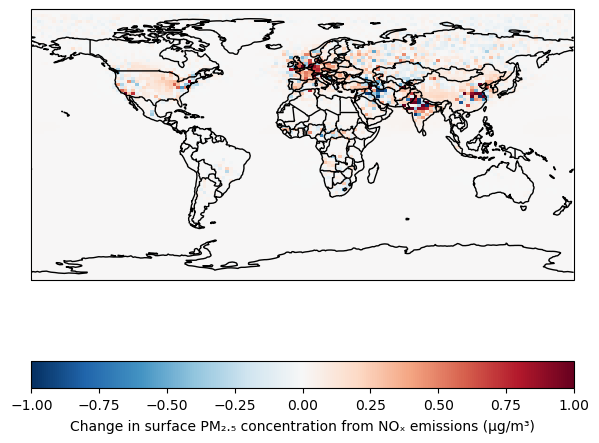

In [30]:
iyr = 1;
ΔX = aqoutput.ΔX_PM25_NOx[:,:,iyr] #(144 lon x 91 lat)

figure(figsize=(7,7))
ax = subplot(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                ΔX, 
                transform=ccrs.PlateCarree(), 
                cmap="RdBu_r",
                vmin=-1, vmax=1,
)
cbar = plt.colorbar(h,orientation="horizontal")
cbar.set_label("Change in surface PM₂.₅ concentration from NOₓ emissions (μg/m³)", labelpad=5)
plt.show()